# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [ ]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_hh_income.isna()
clean_income = df_hh_income.dropna()
clean_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [ ]:
df_pct_poverty.isna()
clean_poverty = df_pct_poverty.dropna()
clean_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
df_pct_completed_hs.isna()
clean_completed_hs = df_pct_completed_hs.dropna()
clean_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
df_share_race_city.isna()
clean_race = df_share_race_city.dropna()
clean_race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
df_fatalities.isna()
clean_fatalities = df_fatalities.dropna()
clean_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
clean_income.duplicated().values.any()
clean_income.isna().any().any()

False

In [ ]:
clean_poverty.duplicated().values.any()
clean_poverty.isna().any().any()

False

In [ ]:
clean_completed_hs.duplicated().values.any()
clean_completed_hs.isna().any().any()

False

In [ ]:
clean_race.duplicated().values.any()
clean_race.isna().any().any()

False

In [ ]:
clean_fatalities.duplicated().values.any()
clean_fatalities.isna().any().any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

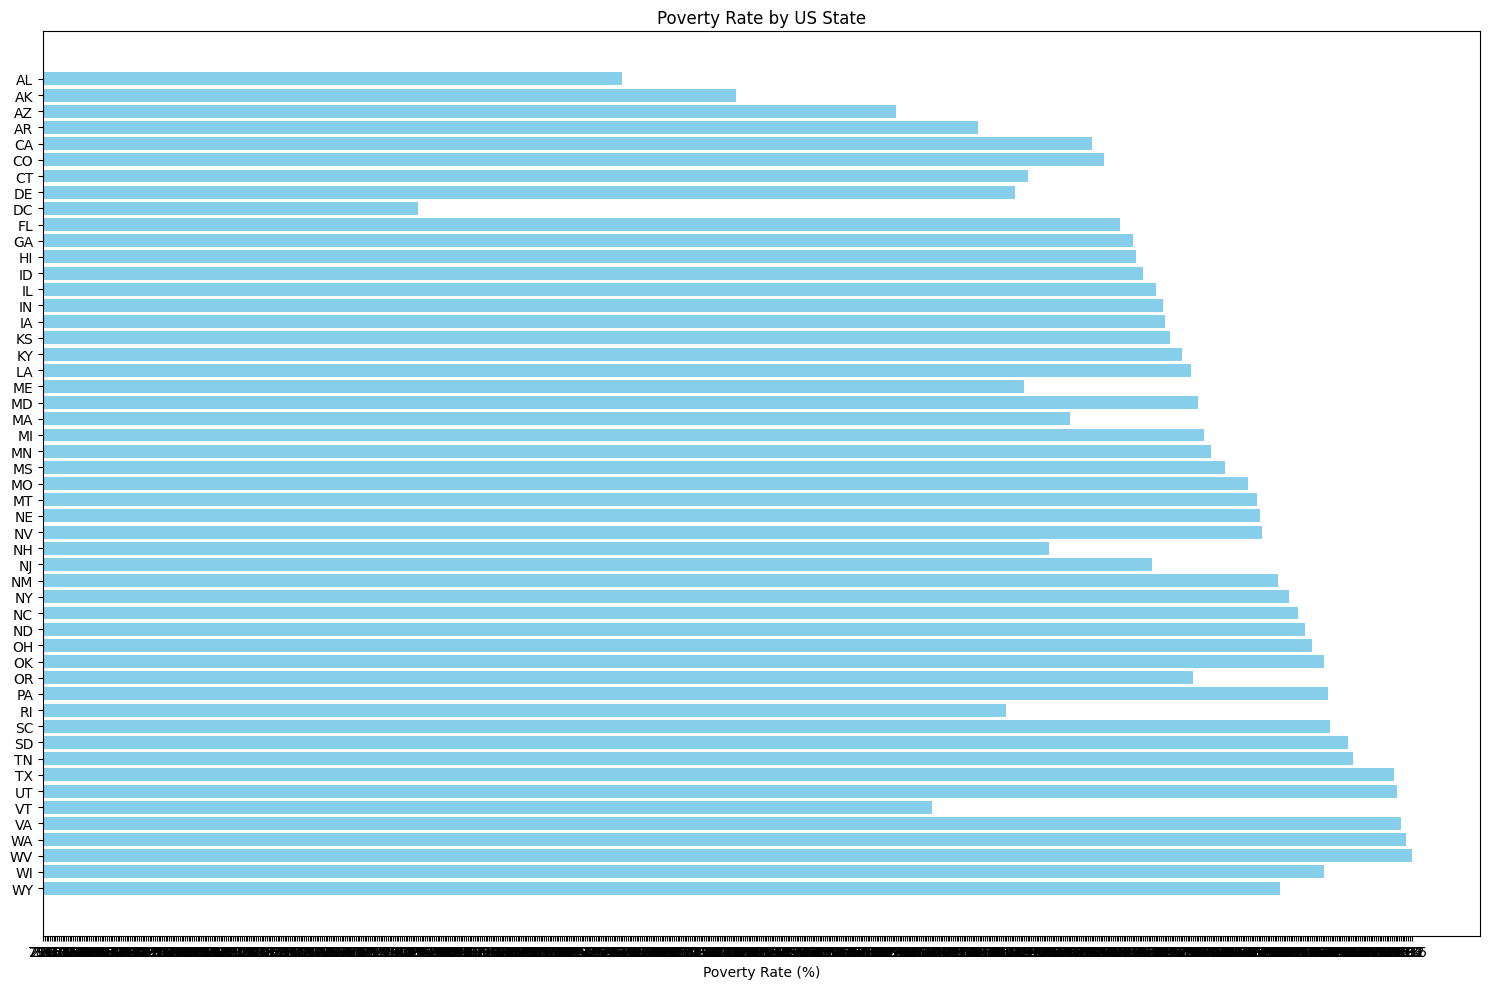

In [ ]:
plt.figure(figsize=(15, 10))
plt.barh(clean_poverty['Geographic Area'], clean_poverty.poverty_rate, color='skyblue')
plt.xlabel('Poverty Rate (%)')
plt.title('Poverty Rate by US State')
plt.gca().invert_yaxis()  #
plt.tight_layout()
plt.show()

In [ ]:
print(f'Highest Poverty Rate is in West Virgina(WV)')

Highest Poverty Rate is in West Virgina(WV)


In [ ]:
print(f'Lowest Poverty Rate is in District of Columbia')

Lowest Poverty Rate is in District of Columbia


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
sorted_clean_completed_hs = clean_completed_hs.sort_values(by='percent_completed_hs')

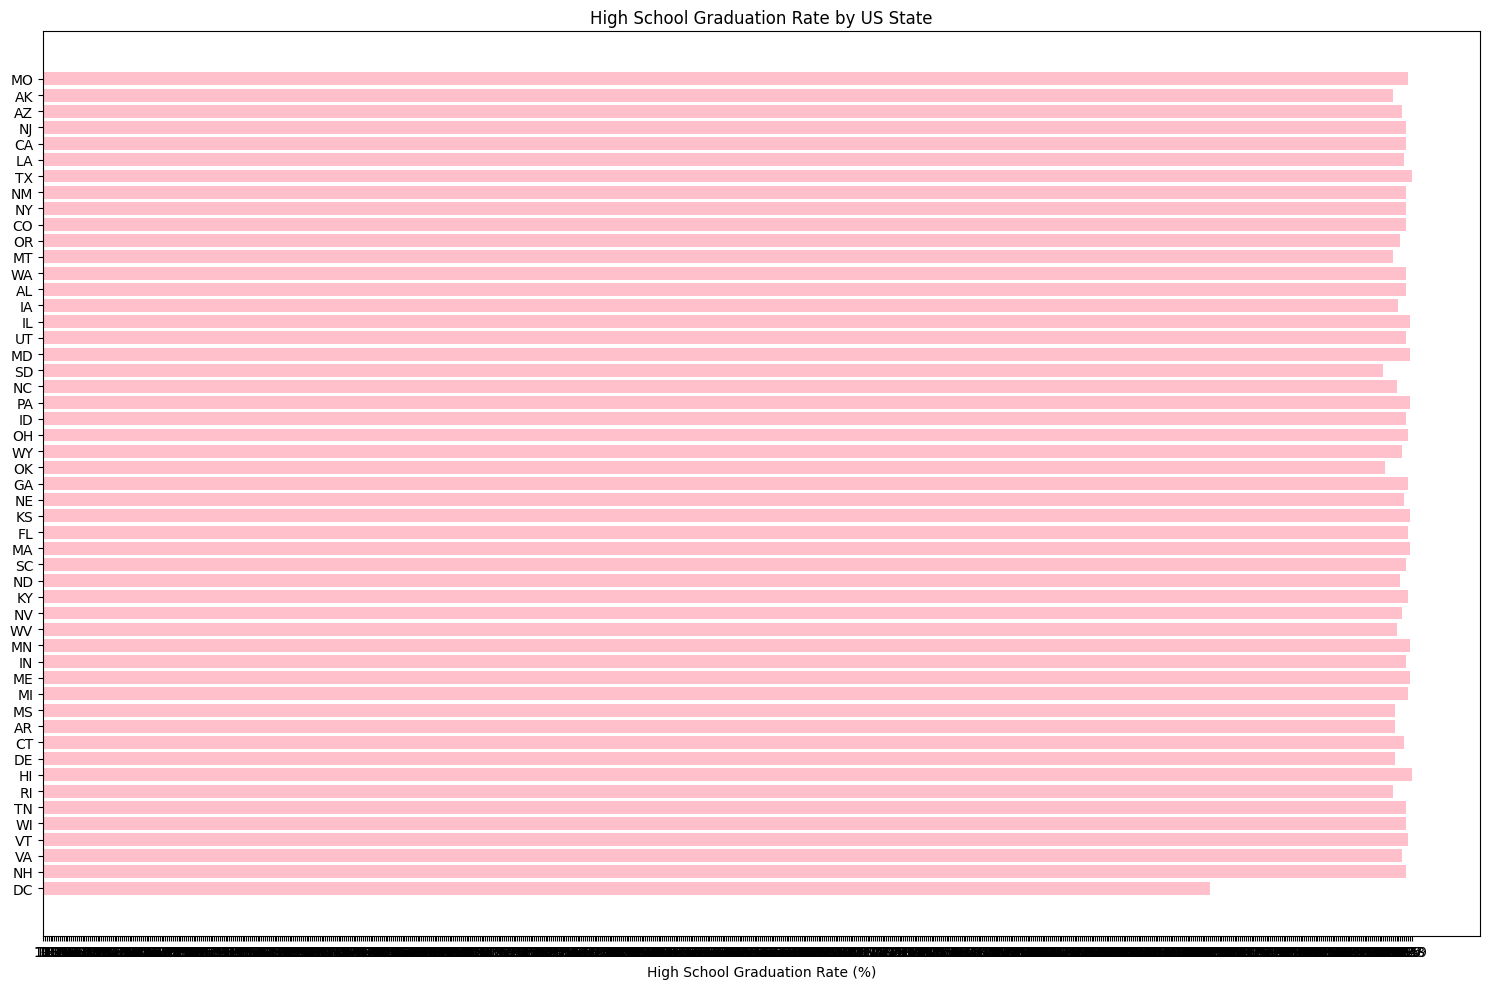

In [ ]:
plt.figure(figsize=(15, 10))
plt.barh(sorted_clean_completed_hs['Geographic Area'], sorted_clean_completed_hs.percent_completed_hs, color='pink')
plt.xlabel('High School Graduation Rate (%)')
plt.title('High School Graduation Rate by US State')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
clean_completed_hs.sort_values(['Geographic Area', 'percent_completed_hs'], ascending=False).groupby('Geographic Area').head()


,Geographic Area,City,percent_completed_hs
29150,WY,Big Piney town,99.4
29184,WY,Elk Mountain town,99.2
29299,WY,South Park CDP,99
29286,WY,Rock River town,98.9
29185,WY,Encampment town,98.8
...,...,...,...
681,AK,Farmers Loop CDP,98.9
600,AK,Anderson city,98.6
794,AK,Nanwalek CDP,98
616,AK,Big Delta CDP,97.6


In [ ]:
print(f"The highest graduation rate is {clean_completed_hs['Geographic Area'][29150]}")

The highest graduation rate is WY


In [ ]:
clean_completed_hs.sort_values(['Geographic Area', 'percent_completed_hs'], ascending=True).groupby('Geographic Area').head()


,Geographic Area,City,percent_completed_hs
632,AK,Chicken CDP,-
637,AK,Chisana CDP,-
662,AK,Dot Lake CDP,-
667,AK,Edna Bay city,-
676,AK,Eureka Roadhouse CDP,-
...,...,...,...
29128,WY,Alcova CDP,-
29133,WY,Antelope Hills CDP,-
29151,WY,Bondurant CDP,-
29152,WY,Boulder CDP,-


In [ ]:
print(f"The lowest graduation rate is {clean_completed_hs['Geographic Area'][632]}")

The lowest graduation rate is AK


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
clean_poverty['poverty_rate'] = pd.to_numeric(clean_poverty['poverty_rate'], errors='coerce')


In [ ]:
clean_completed_hs['percent_completed_hs'] = pd.to_numeric(clean_completed_hs['percent_completed_hs'], errors='coerce')


In [ ]:
df_poverty = clean_poverty.groupby('Geographic Area').agg({'poverty_rate': 'mean'})


In [ ]:
df_grad = clean_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs': 'mean'})


In [ ]:
window_size = 3
smoothed_poverty_rate = df_poverty['poverty_rate'].rolling(window=window_size, min_periods=1).mean()


In [ ]:
smoothed_poverty_rate.head()

Geographic Area
AK   19.85
AL   20.25
AR   21.15
AZ   23.09
CA   21.92
Name: poverty_rate, dtype: float64

In [ ]:
smoothed_graduation_rate = df_grad['percent_completed_hs'].rolling(window=window_size, min_periods=1).mean()

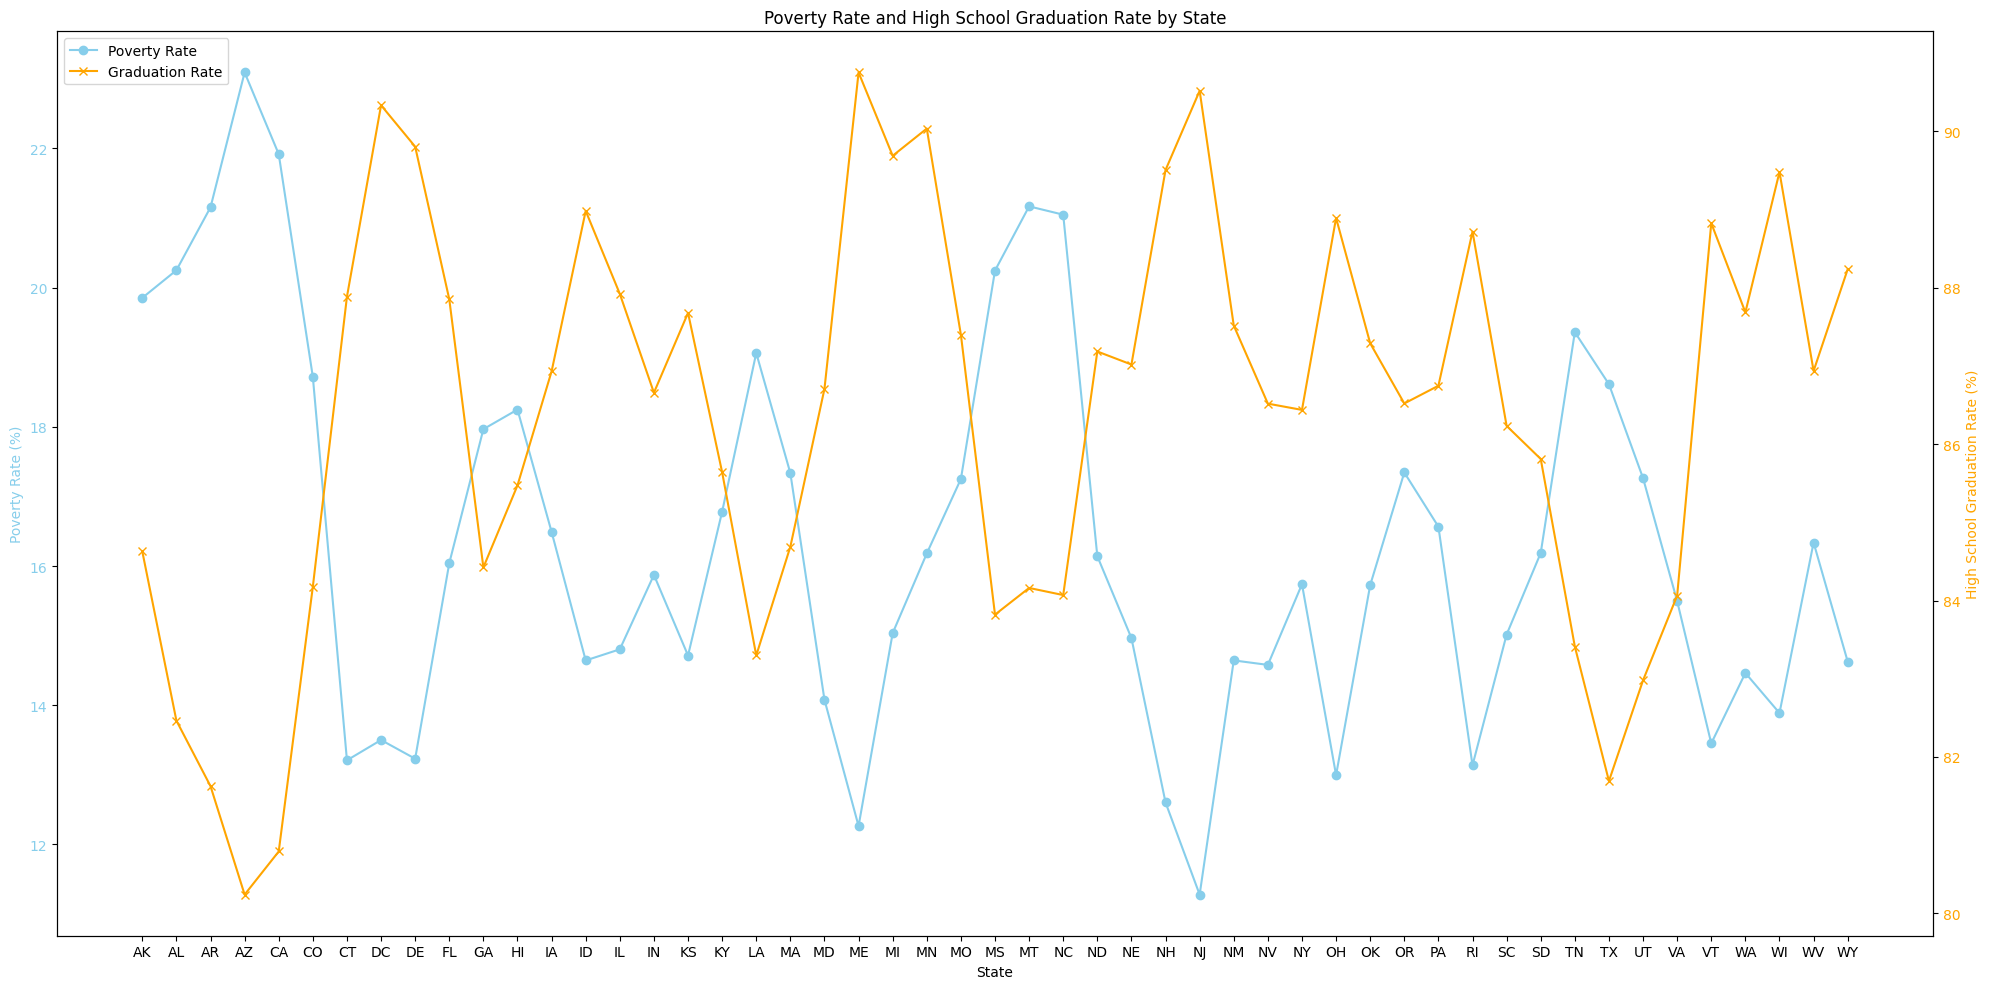

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot poverty rate on first y-axis
ax1.plot(df_poverty.index, smoothed_poverty_rate, color='skyblue', marker='o', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create second y-axis and plot high school graduation rate
ax2 = ax1.twinx()
ax2.plot(df_grad.index, smoothed_graduation_rate, color='orange', marker='x', label='Graduation Rate')
ax2.set_ylabel('High School Graduation Rate (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

plt.title('Poverty Rate and High School Graduation Rate by State')

plt.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [ ]:
merged_df = pd.merge(clean_poverty, clean_completed_hs, on='Geographic Area')


In [ ]:
summary_df = merged_df.groupby('Geographic Area').agg({'poverty_rate': 'mean', 'percent_completed_hs': 'mean'}).reset_index()


In [ ]:
state_palette = sns.color_palette("husl", n_colors=len(summary_df['Geographic Area']))


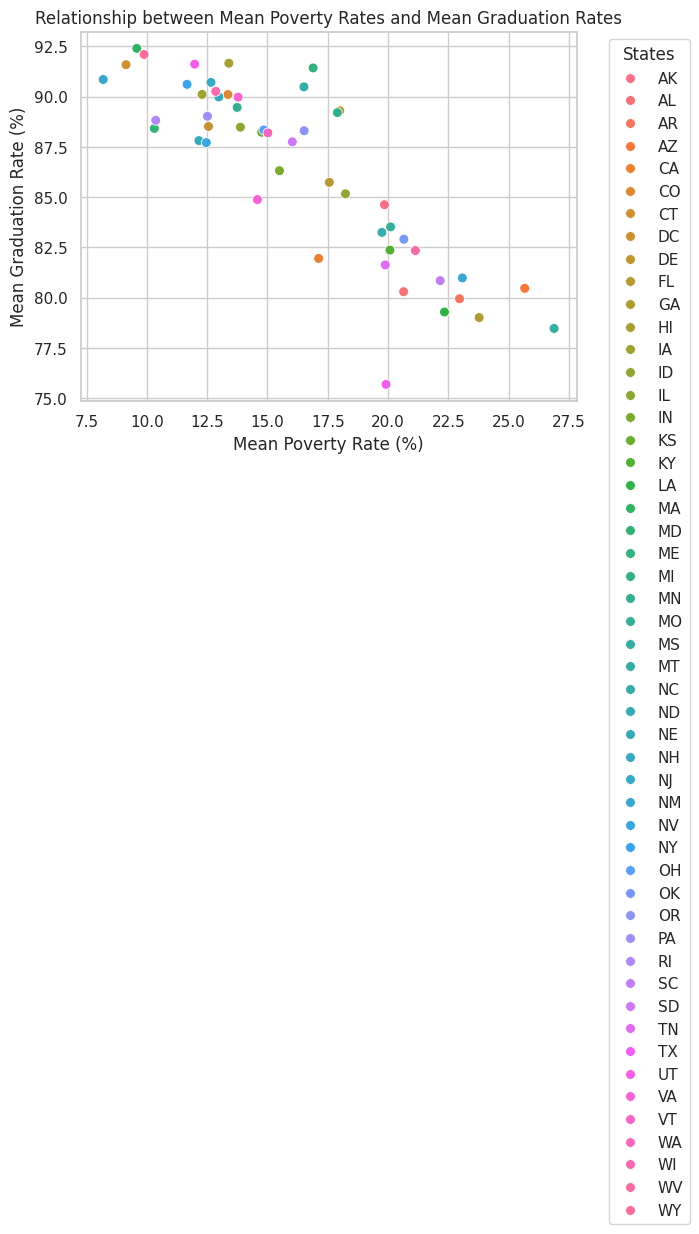

In [ ]:
sns.set(style="whitegrid")
sns.scatterplot(data=summary_df, x='poverty_rate', y='percent_completed_hs', hue='Geographic Area', palette=state_palette, s=50)

# Set labels and title
plt.xlabel("Mean Poverty Rate (%)")
plt.ylabel("Mean Graduation Rate (%)")
plt.title("Relationship between Mean Poverty Rates and Mean Graduation Rates")

# Adjust legend
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

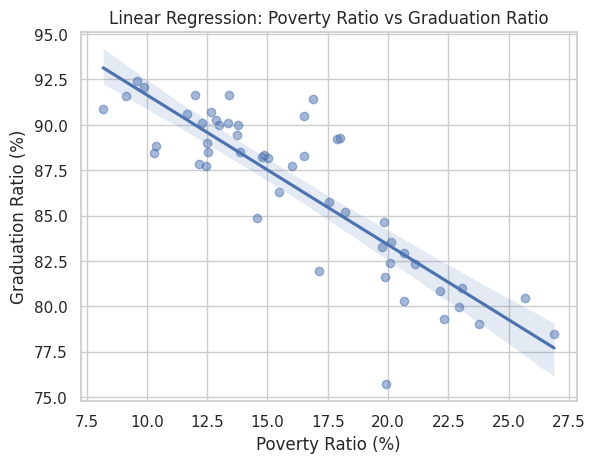

In [ ]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=summary_df, scatter_kws={'alpha':0.5})

# Set labels and title
plt.xlabel("Poverty Ratio (%)")
plt.ylabel("Graduation Ratio (%)")
plt.title("Linear Regression: Poverty Ratio vs Graduation Ratio")

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
clean_race.set_index('Geographic area', inplace=True)

KeyError: "None of ['Geographic area'] are in the columns"

In [ ]:
clean_race[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = clean_race[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')


In [ ]:
mean_values = clean_race[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].mean()


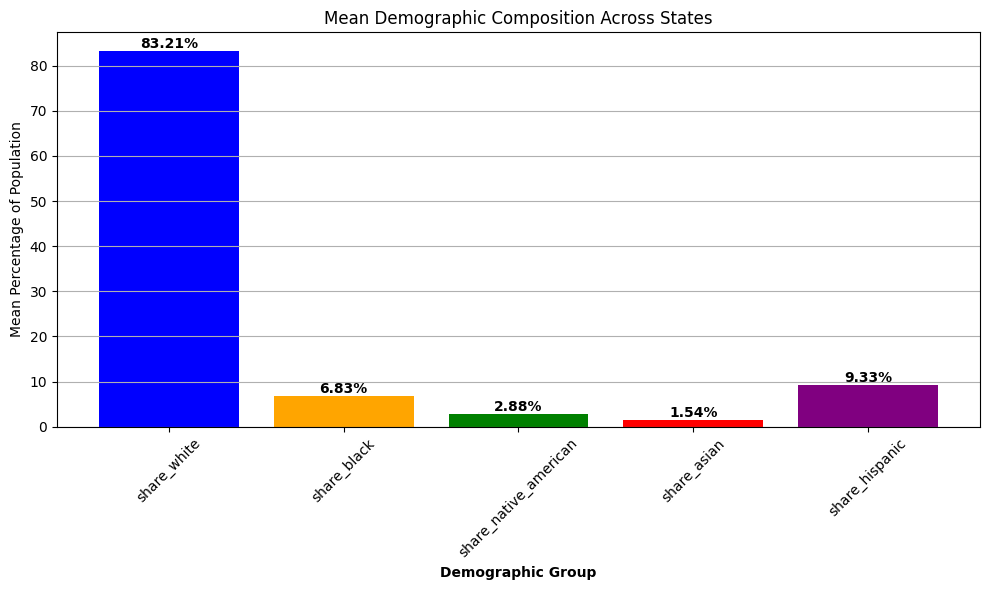

In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(mean_values.index, mean_values, color=colors)

# Adding text labels for each bar
for bar, value in zip(bars, mean_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Demographic Group', fontweight='bold')
plt.ylabel('Mean Percentage of Population')
plt.title('Mean Demographic Composition Across States')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
clean_fatalities['race'] = clean_fatalities['race'].replace({
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'O': 'Other',
    'N': 'Native American'
})

<ipython-input-46-830aaade3fb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fatalities['race'] = clean_fatalities['race'].replace({


In [ ]:
race_counts = clean_fatalities['race'].value_counts()


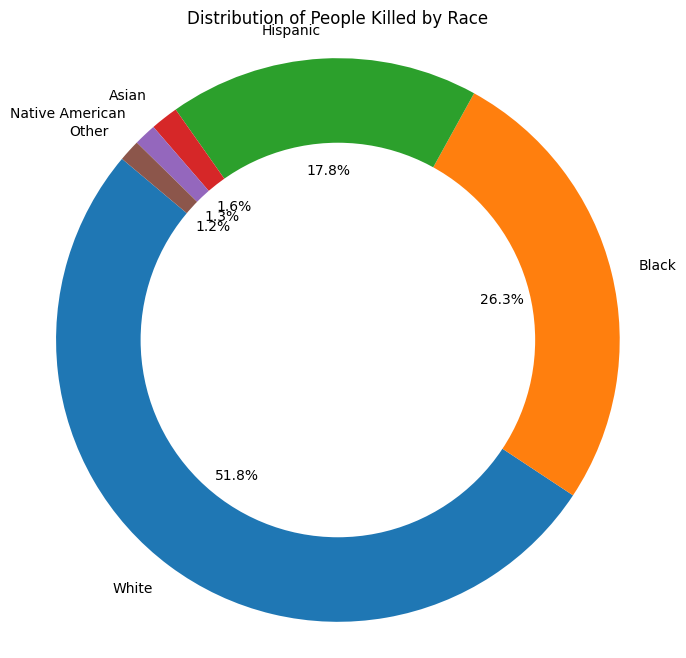

In [ ]:
plt.figure(figsize=(8, 8))


plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')

plt.title('Distribution of People Killed by Race')

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
clean_fatalities['gender'] = clean_fatalities['gender'].replace({
    'F': 'Female',
    'M': 'Male'
})

<ipython-input-57-1b54f75095fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_fatalities['gender'] = clean_fatalities['gender'].replace({


In [ ]:
gender_column = clean_fatalities['gender']


In [ ]:
gender_counts = gender_column.value_counts()

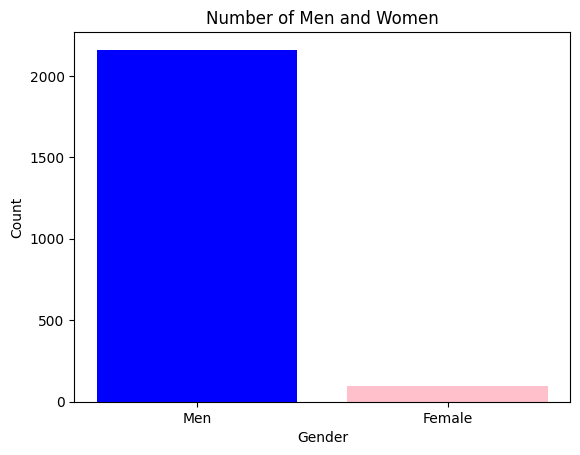

In [ ]:
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.title('Number of Men and Women')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

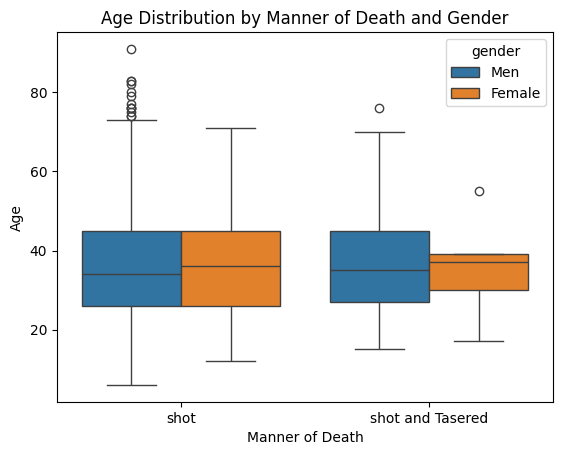

In [ ]:
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=clean_fatalities)

# Title and labels
plt.title('Age Distribution by Manner of Death and Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')

# Show plot
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
unarmed_count = (clean_fatalities['armed'] == 'unarmed').sum()
other_count = clean_fatalities.shape[0] - unarmed_count

# Display the counts
print("Unarmed:", unarmed_count)
print("Other Names:", other_count)

Unarmed: 165
Other Names: 2089


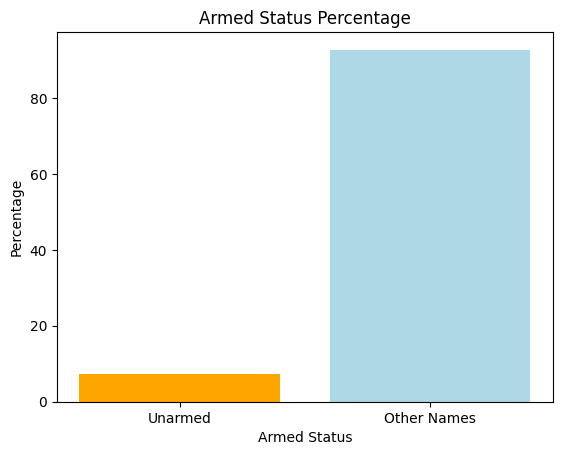

In [ ]:

# Calculate percentages
total_count = clean_fatalities.shape[0]
unarmed_percentage = (unarmed_count / total_count) * 100
other_percentage = (other_count / total_count) * 100

# Plotting
plt.bar(['Unarmed', 'Other Names'], [unarmed_percentage, other_percentage], color=['orange', 'lightblue'])

# Title and labels
plt.title('Armed Status Percentage')
plt.xlabel('Armed Status')
plt.ylabel('Percentage')

plt.show()

Work out what percentage of people killed were under 25 years old.  

In [ ]:
under_25_count = (clean_fatalities['age'] < 25).sum()

# Calculate percentage
total_count = clean_fatalities.shape[0]
under_25_percentage = (under_25_count / total_count) * 100

# Display the percentage
print("Percentage of ages under 25: {:.2f}%".format(under_25_percentage))

Percentage of ages under 25: 18.72%


Create a histogram and KDE plot that shows the
distribution of ages of the people killed by police.

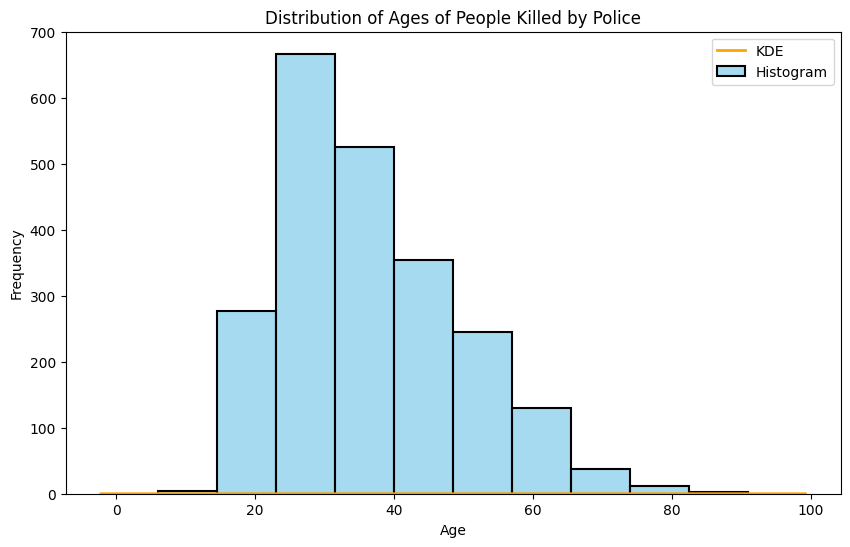

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=clean_fatalities, x='age', bins=10, kde=False, color='skyblue', edgecolor='black', linewidth=1.5)

sns.kdeplot(data=clean_fatalities, x='age', color='orange', linewidth=2)

plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend(labels=['KDE', 'Histogram'])

plt.show()


Create a seperate KDE plot for each race. Is there a
difference between the distributions?

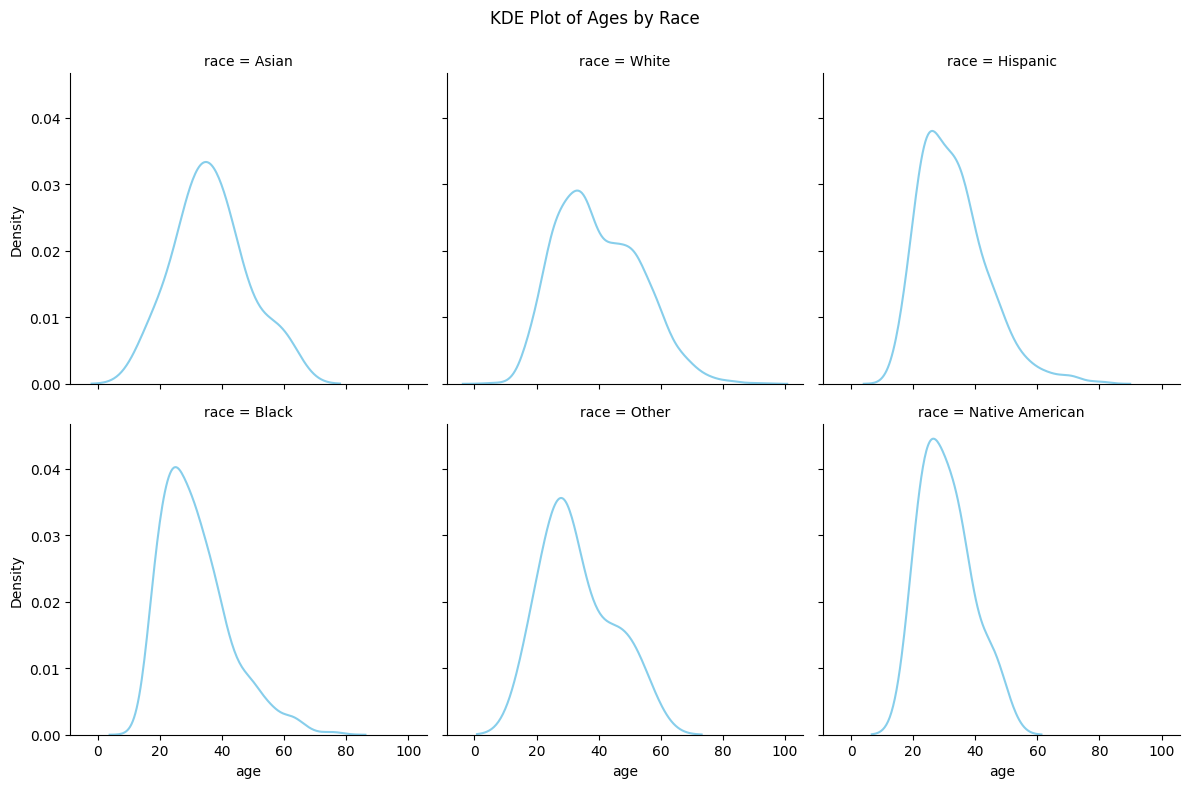

In [ ]:
ethnicity = sns.FacetGrid(clean_fatalities, col='race', col_wrap=3, height=4)
ethnicity.map(sns.kdeplot, 'age', color='skyblue')

# Title
plt.subplots_adjust(top=0.9)
ethnicity.fig.suptitle('KDE Plot of Ages by Race')

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

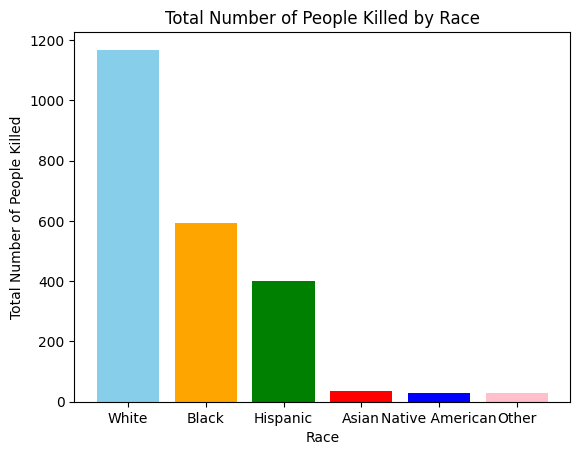

In [ ]:
race_counts = clean_fatalities['race'].value_counts()

# Plotting
plt.bar(race_counts.index, race_counts.values, color=['skyblue', 'orange', 'green', 'red', 'blue', 'pink'])

# Title and labels
plt.title('Total Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('Total Number of People Killed')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental_illness_count = clean_fatalities['signs_of_mental_illness'].sum()

# Total number of individuals killed by police
total_count = clean_fatalities.shape[0]

# Calculate percentage
percentage_mental_illness = (mental_illness_count / total_count) * 100

# Display the percentage
print("Percentage of people killed by police with a mental illness: {:.2f}%".format(percentage_mental_illness))

Percentage of people killed by police with a mental illness: 25.42%


In [ ]:
mental_illness_count


573

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
highest_value_city = clean_fatalities['city'].value_counts().idxmax()


Los Angeles    35
Phoenix        28
Houston        24
Chicago        22
Austin         18
               ..
Burkesville     1
Mesquite        1
Norwood         1
Opelika         1
Oshkosh         1
Name: city, Length: 1282, dtype: int64


In [ ]:
print(f'The most dangerous city is {highest_value_city}')


The most dangerous city is Los Angeles


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
clean_fatalities.shape

(2254, 14)

In [ ]:
top_10_cities = clean_fatalities['city'].value_counts().head(10).index.tolist()

race_shares_by_city = {}
for city in top_10_cities:
    city_deaths = clean_fatalities[clean_fatalities['city'] == city]
    total_deaths_in_city = city_deaths.shape[0]
    race_shares_by_city[city] = {
        'White': city_deaths[city_deaths['race'] == 'White'].shape[0] / total_deaths_in_city,
        'Black': city_deaths[city_deaths['race'] == 'Black'].shape[0] / total_deaths_in_city,
        'Hispanic': city_deaths[city_deaths['race'] == 'Hispanic'].shape[0] / total_deaths_in_city,
        'Asian': city_deaths[city_deaths['race'] == 'Asian'].shape[0] / total_deaths_in_city,
        'Others': city_deaths[city_deaths['race'] == 'Others'].shape[0] / total_deaths_in_city,
    }

In [ ]:
for city, race_shares in race_shares_by_city.items():
    print(f"Race shares in {city}:")
    print(race_shares)

Race shares in Los Angeles:
{'White': 0.17142857142857143, 'Black': 0.2857142857142857, 'Hispanic': 0.5142857142857142, 'Asian': 0.02857142857142857, 'Others': 0.0}
Race shares in Phoenix:
{'White': 0.42857142857142855, 'Black': 0.07142857142857142, 'Hispanic': 0.39285714285714285, 'Asian': 0.0, 'Others': 0.0}
Race shares in Houston:
{'White': 0.125, 'Black': 0.5833333333333334, 'Hispanic': 0.20833333333333334, 'Asian': 0.041666666666666664, 'Others': 0.0}
Race shares in Chicago:
{'White': 0.09090909090909091, 'Black': 0.8636363636363636, 'Hispanic': 0.045454545454545456, 'Asian': 0.0, 'Others': 0.0}
Race shares in Austin:
{'White': 0.7222222222222222, 'Black': 0.16666666666666666, 'Hispanic': 0.1111111111111111, 'Asian': 0.0, 'Others': 0.0}
Race shares in Las Vegas:
{'White': 0.5294117647058824, 'Black': 0.17647058823529413, 'Hispanic': 0.29411764705882354, 'Asian': 0.0, 'Others': 0.0}
Race shares in Columbus:
{'White': 0.375, 'Black': 0.5625, 'Hispanic': 0.0, 'Asian': 0.0, 'Others': 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
city_counts_per_state = clean_fatalities.groupby('state')['city'].nunique().reset_index(name='city_count')


In [ ]:
city_counts_per_state


,state,city_count
0,AK,8
1,AL,37
2,AR,17
3,AZ,35
4,CA,196
5,CO,30
6,CT,7
7,DC,1
8,DE,6
9,FL,77


In [ ]:
us_states_geojson = px.data.election_geojson()

# Plot the choropleth map
fig = px.choropleth(city_counts_per_state,
                    locations='state',
                    geojson=us_states_geojson,
                    color='city_count',
                    color_continuous_scale='Viridis',
                    range_color=(0, city_counts_per_state['city_count'].max()),
                    locationmode='USA-states',  # Specify the location mode
                    scope='usa',
                    labels={'city_count': 'City Count', 'state': 'State'},
                    hover_name='state',
                    title='City Count per State in the USA'
                   )

# Show the plot
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
clean_fatalities.date = pd.to_datetime(clean_fatalities['date'])

<ipython-input-115-45ed74f84488>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_fatalities.date

0      2015-02-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-04-01
          ...    
2519   2017-07-25
2523   2017-07-26
2525   2017-07-27
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2254, dtype: datetime64[ns]

In [ ]:
killing_counts_over_time = clean_fatalities.groupby(clean_fatalities['date'].dt.to_period('M'))['city'].nunique()


In [ ]:
counts_smoothed = killing_counts_over_time.rolling(window=3).mean()


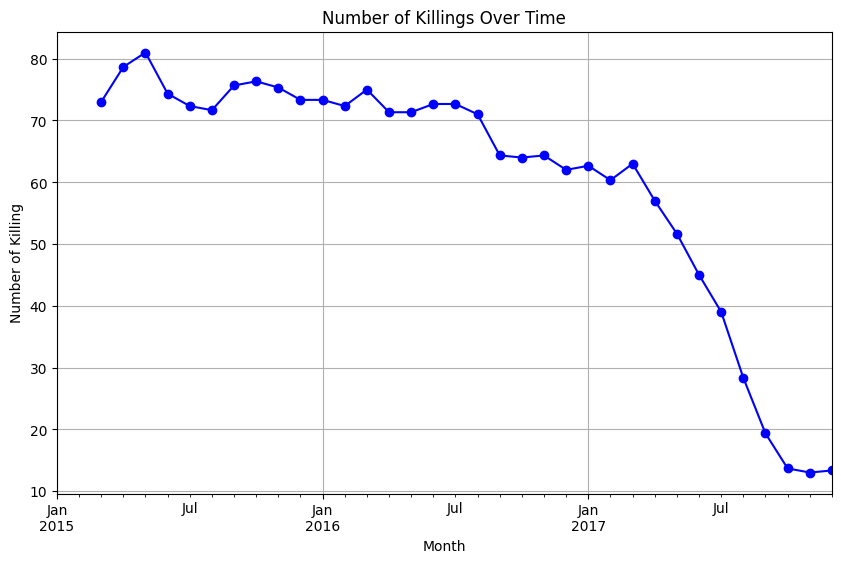

In [ ]:
plt.figure(figsize=(10, 6))
counts_smoothed.plot(kind='line', marker='o', color='b')
plt.title('Number of Killings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Killing')
plt.grid(True)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).